# MOwNiT - Transformata Fouriera

## Przykład

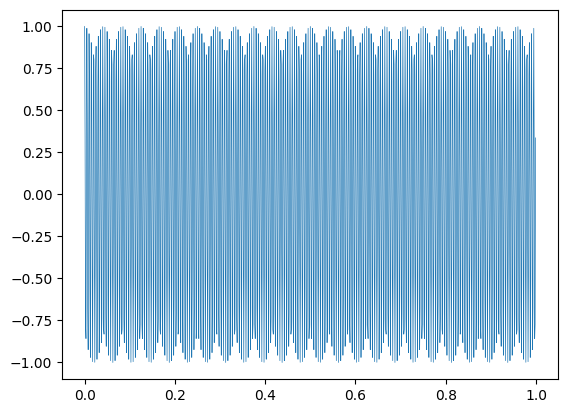

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# produkcja sztucznego sygnału
# wybieramy częstotliwość próbkowania
Fs = 1024

# generujemy wektor punktów czasowych w przedziale [0,1] co 1/Fs
t = np.arange(0,1,1/Fs)

#Obliczam wartość sygnału (tutaj sinus o częstotliwości 200 Hz)
x = np.cos(2*np.pi*t*200)

# wizualizacja
plt.plot(t,x,linewidth=0.5)
plt.show()

### Transformata Fouriera w `scipy`

Dyskretna transformata Fouriera `fft()` skończonego ciągu $x(n)$ o długości $N$ jest zdefiniowana w `scipy` jako
$$y(k)=\sum_{n=0}^{N-1}e^{-2\pi i\frac{kn}{N}}x(n)$$
a tranformata odwrotna `ifft()` jako
$$x(n)=\frac{1}{N}\sum_{k=0}^{N-1}e^{-2\pi i\frac{kn}{N}}y(k)$$

Transformata Fouriera przekształca sygnał z dziedziny czasu na dziedzinę częstotliwości. Dyskretne punkty nowej dziedziny dostajemy funkcją `fftfreq()`.

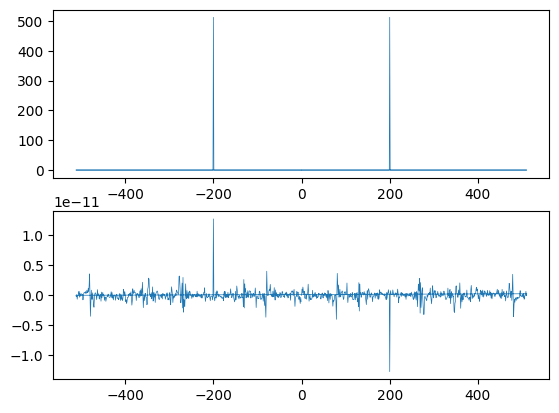

In [2]:
from scipy.fft import fft,ifft,fftfreq

y=fft(x)

N=len(t)
f=fftfreq(N,1/Fs)

fig,[ax1,ax2]=plt.subplots(2)
ax1.plot(f,np.real(y),linewidth=0.5)
ax2.plot(f,np.imag(y),linewidth=0.5)

plt.show()

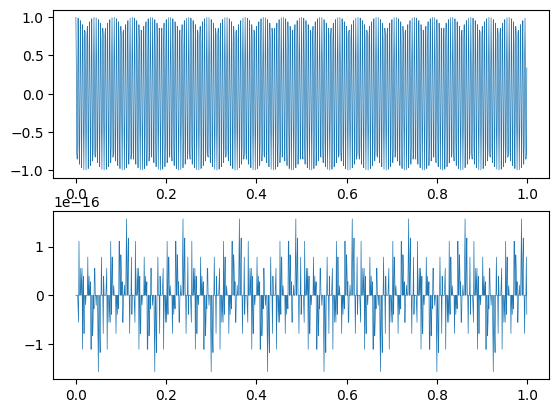

In [3]:
xinv=ifft(y)

fig,[ax1,ax2]=plt.subplots(2)
ax1.plot(t,np.real(xinv),linewidth=0.5)
ax2.plot(t,np.imag(xinv),linewidth=0.5)

plt.show()

Jeżeli chcemy rzeczywistą transformatę Fouriera, to używamy funkcji `rfft()`, `irfft()`, `rfftfreq()`.

/home/wiktor/university/sem4/mownit/mownit_env/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/wiktor/university/sem4/mownit/mownit_env/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


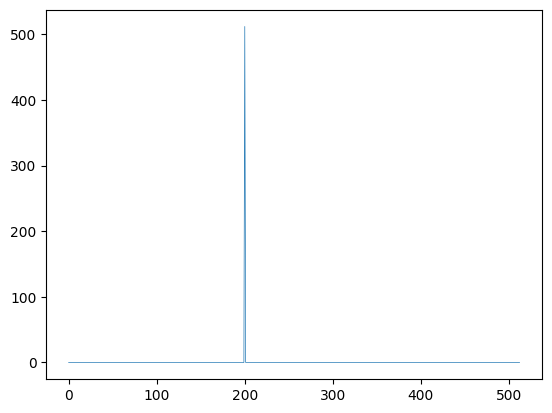

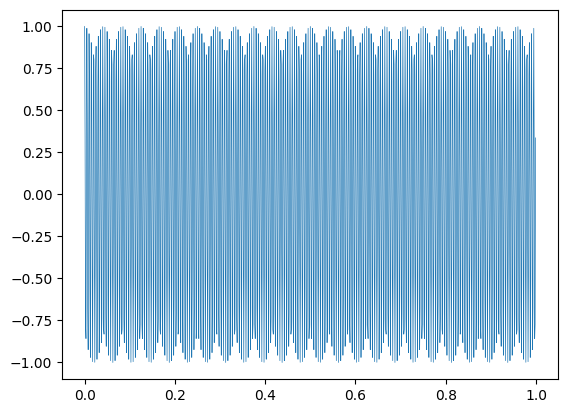

In [4]:
from scipy.fft import rfft,irfft,rfftfreq

yr=rfft(x)

N=len(t)
rfr=rfftfreq(N,1/Fs)


plt.plot(rfr,yr,linewidth=0.5)
plt.show()

rxinv=irfft(yr)


plt.plot(t,rxinv,linewidth=0.5)
plt.show()


## Zadanie 1 (1 pkt).
Oblicz transformatę Fouriera dla sumy sygnałów
```python
x = np.sin(2*np.pi*t*200) + 2* np.sin(2*np.pi*t*400) 
```
Zwizualizuj i wyjaśnij otrzymany rezultat.

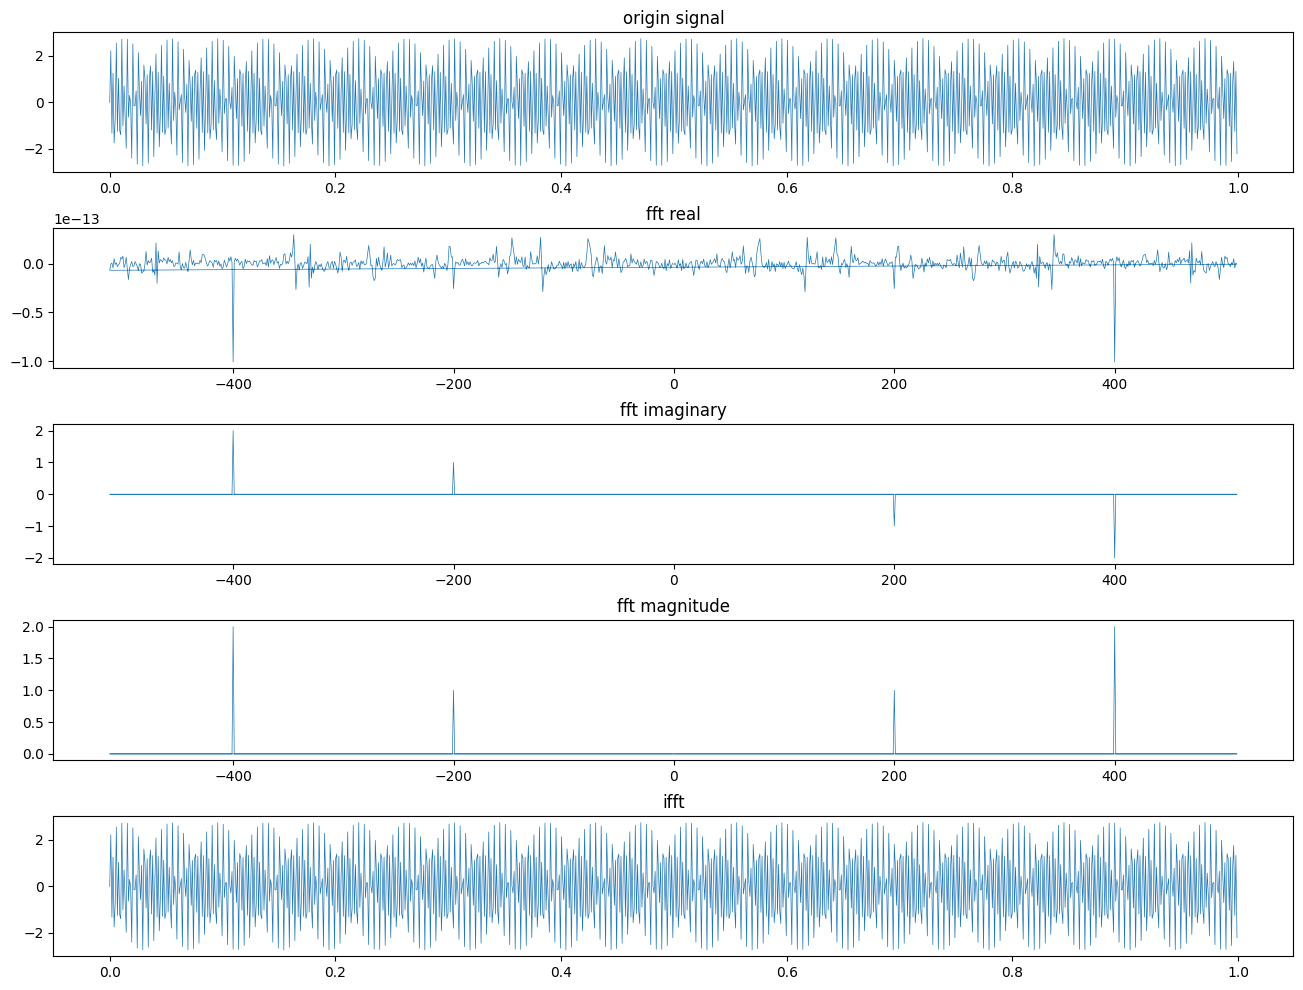

In [5]:
x_sum = np.sin(2 * np.pi * t * 200) + 2 * np.sin(2*np.pi*t*400)
y_sum = fft(x_sum)
N_sum = len(t)
f_sum = fftfreq(N, 1/Fs)
normalize_factor = 2 / N

fig, axs = plt.subplots(5, figsize = (16, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

axs[0].set_title("origin signal")
axs[0].plot(t, x_sum, linewidth = 0.5)

axs[1].set_title("fft real")
axs[1].plot(f_sum, normalize_factor * np.real(y_sum), linewidth = 0.5)

axs[2].set_title("fft imaginary")
axs[2].plot(f_sum, normalize_factor * np.imag(y_sum), linewidth = 0.5)

axs[3].set_title("fft magnitude")
axs[3].plot(f_sum, normalize_factor * np.abs(y_sum), linewidth = 0.5)

x_sum_inv = ifft(y_sum)

axs[4].set_title("ifft")
axs[4].plot(t, x_sum_inv, linewidth = 0.5)


plt.show()

#### Analiza wyników

Transformata Fouriera pozwala nam na uzyskanie widma częstotliwościowego danego przebiegu. Aby odczytać jakie funkcje składowe tworzą nasz przebieg należy wyznaczyć moduł z wyniku transformaty oraz pomnożyć go przez czynnik normalizujący, aby dodatkowo wyznaczyć amplitudy tych składowych. Z wykresu "fft magnitude" otrzymujemy potwierdzeni, że przebieg ten powstał z przebiegów o częstotliwości 200 oraz 400 Hz o amplitudach odpowiednio 1 oraz 2.

## Zadanie 2 (1 pkt). 
Usuwanie szumów:

1. Stworzyć tablicę wartości funkcji cosinus ("sygnału") zaburzonych niewielkim "szumem" np. dodając do każdej wartości wylosowaną liczbę funkcją `np.randn()`.
2. Naszkicować wykres zaszumionej funkcji.
3. Naszkicować wykres transformaty Fouriera (widmo) tego sygnału.
4. Po transformacie wyzerowac w widmie wszystkie elementy, których wartość bezwzględna jest mniejsza niz 50. W ten sposób usuwamy "szumy" z sygnału.
5. Przeprowadzić odwrotną transformatę. Narysować wykres otrzymanej funkcji. Porównać z wejściowym wykresem sygnału.

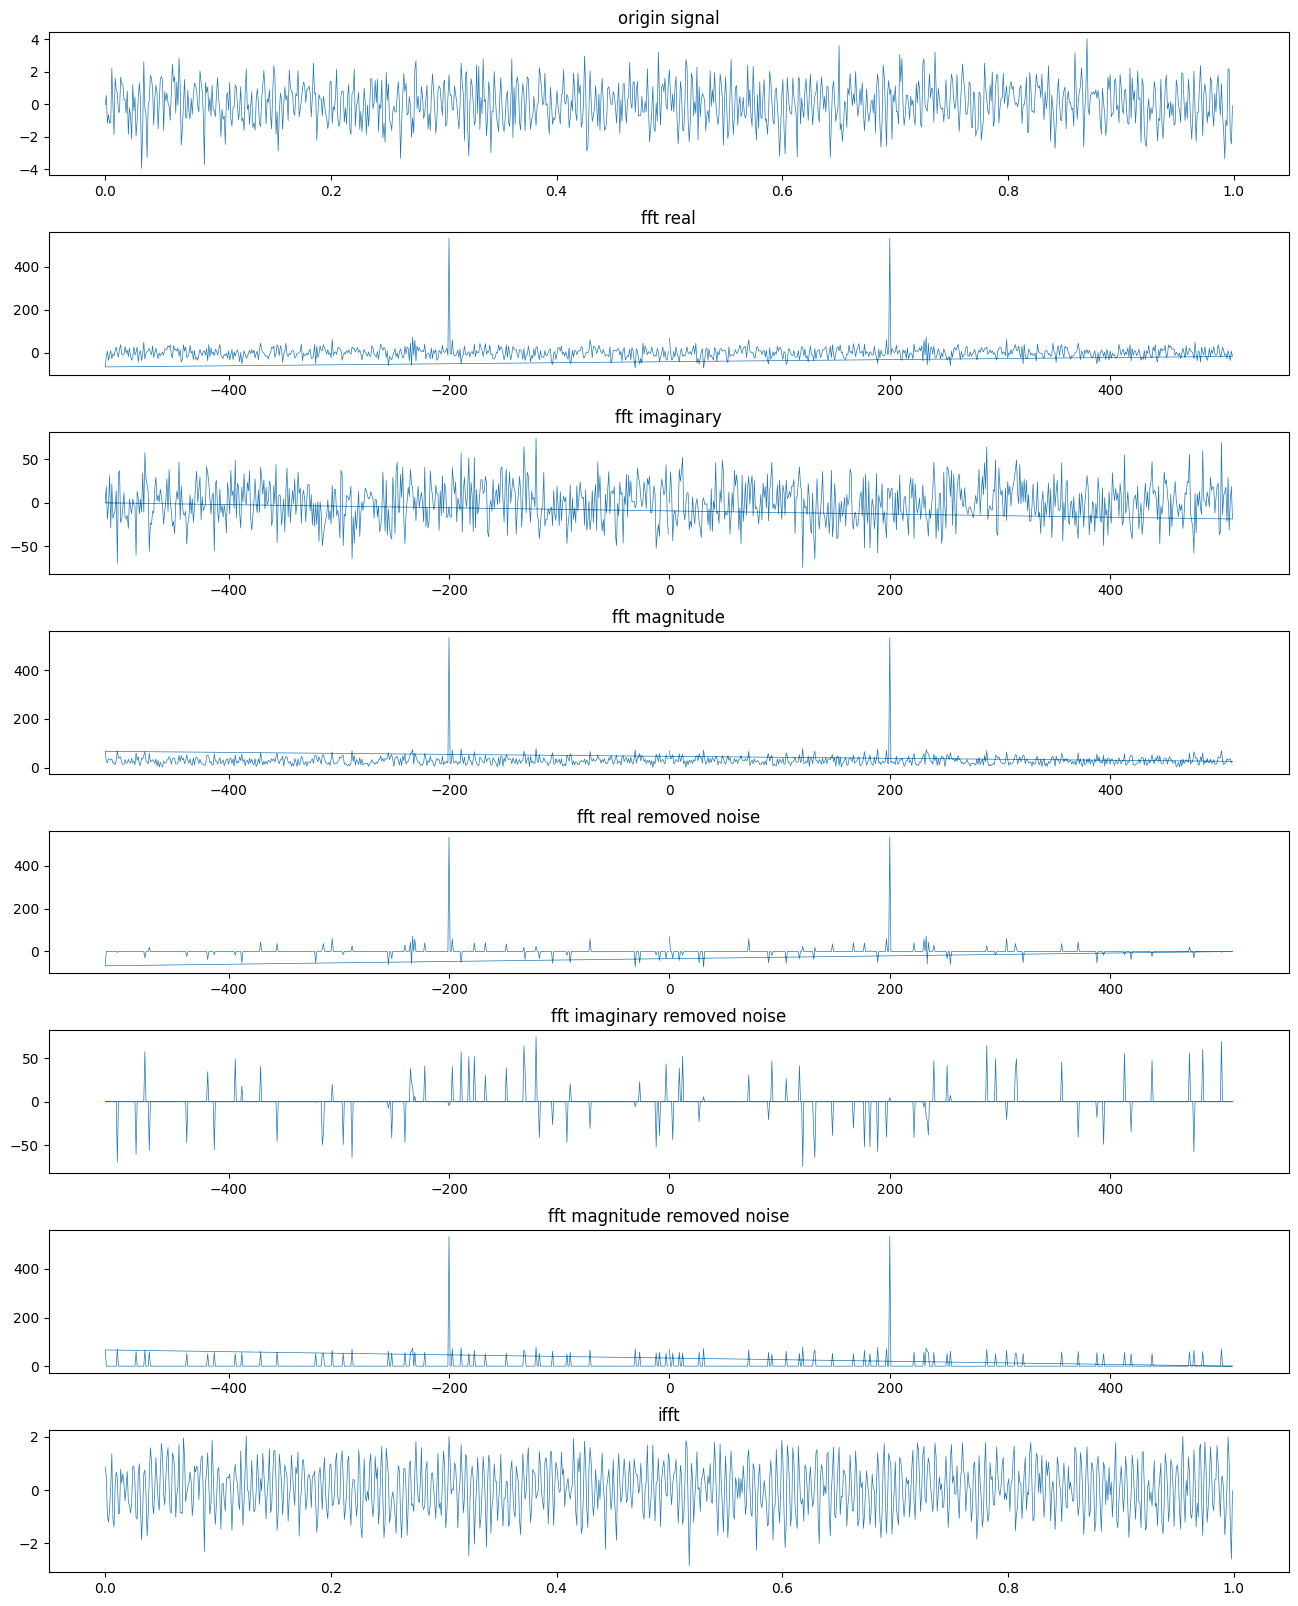

In [6]:
x_noisy_cos = np.cos(2 * np.pi * t * 200) + np.random.randn(t.shape[0])
y_noisy_cos = fft(x_noisy_cos)
N = len(t)
f_noisy_cos = fftfreq(N, 1/Fs)

y_noisy_cos_removed_noise = np.copy(y_noisy_cos)
y_noisy_cos_removed_noise[np.abs(y_noisy_cos_removed_noise) < 50] = 0
x_noisy_cos_removed_noise_inv = ifft(y_noisy_cos_removed_noise)

fig, axs = plt.subplots(8, figsize = (16, 20))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

axs[0].set_title("origin signal")
axs[0].plot(t, x_noisy_cos, linewidth = 0.5)

axs[1].set_title("fft real")
axs[1].plot(f_noisy_cos, np.real(y_noisy_cos), linewidth = 0.5)

axs[2].set_title("fft imaginary")
axs[2].plot(f_noisy_cos, np.imag(y_noisy_cos), linewidth = 0.5)

axs[3].set_title("fft magnitude")
axs[3].plot(f_noisy_cos, np.abs(y_noisy_cos), linewidth = 0.5)

axs[4].set_title("fft real removed noise")
axs[4].plot(f_noisy_cos, np.real(y_noisy_cos_removed_noise), linewidth = 0.5)

axs[5].set_title("fft imaginary removed noise")
axs[5].plot(f_noisy_cos, np.imag(y_noisy_cos_removed_noise), linewidth = 0.5)

axs[6].set_title("fft magnitude removed noise")
axs[6].plot(f_noisy_cos, np.abs(y_noisy_cos_removed_noise), linewidth = 0.5)

axs[7].set_title("ifft")
axs[7].plot(t, x_noisy_cos_removed_noise_inv, linewidth = 0.5)
plt.show()


## Zadanie 3 (3 pkt).

Zastosować trasformatę Fouriera na krótkim pliku dźwiękowym (najlepiej nagranie głosu). Narysować wykres widma (uwaga: przy rysowaniu należy przetworzyć możliwie małą próbkę ze względu na problemy z rysowaniem wykresów w Jupyterze dla dużych danych). Następnie poeksperymentować (wyciąć wybrane częstotliwości), dokonać odwrotnej transformaty i odsłuchać efekt.

Przydatne materiały:
1. <a href="http://samcarcagno.altervista.org/blog/basic-sound-processing-julia/"> Basic sound processing</a>
2. <a href="https://github.com/dancasimiro/WAV.jl"> Pakiet Wav </a>

In [7]:
import librosa

In [8]:
mp3_test_fiel = "test.mp3"

In [9]:
x_mp3, sr = librosa.load(mp3_test_fiel, sr=None, mono=True)

In [10]:
N = x_mp3.shape[0]
y_mp3 = rfft(x_mp3)
f_mp3 = rfftfreq(N, 1 / sr)
duration = librosa.get_duration(y = x_mp3, sr = sr)
t_mp3 = np.linspace(0, duration, x_mp3.shape[0])

In [11]:
y_mp3_changed = np.copy(y_mp3)
y_mp3_changed[(f_mp3 > 20) & (f_mp3 < 1500)] = 0
x_mp3_changed = irfft(y_mp3_changed)

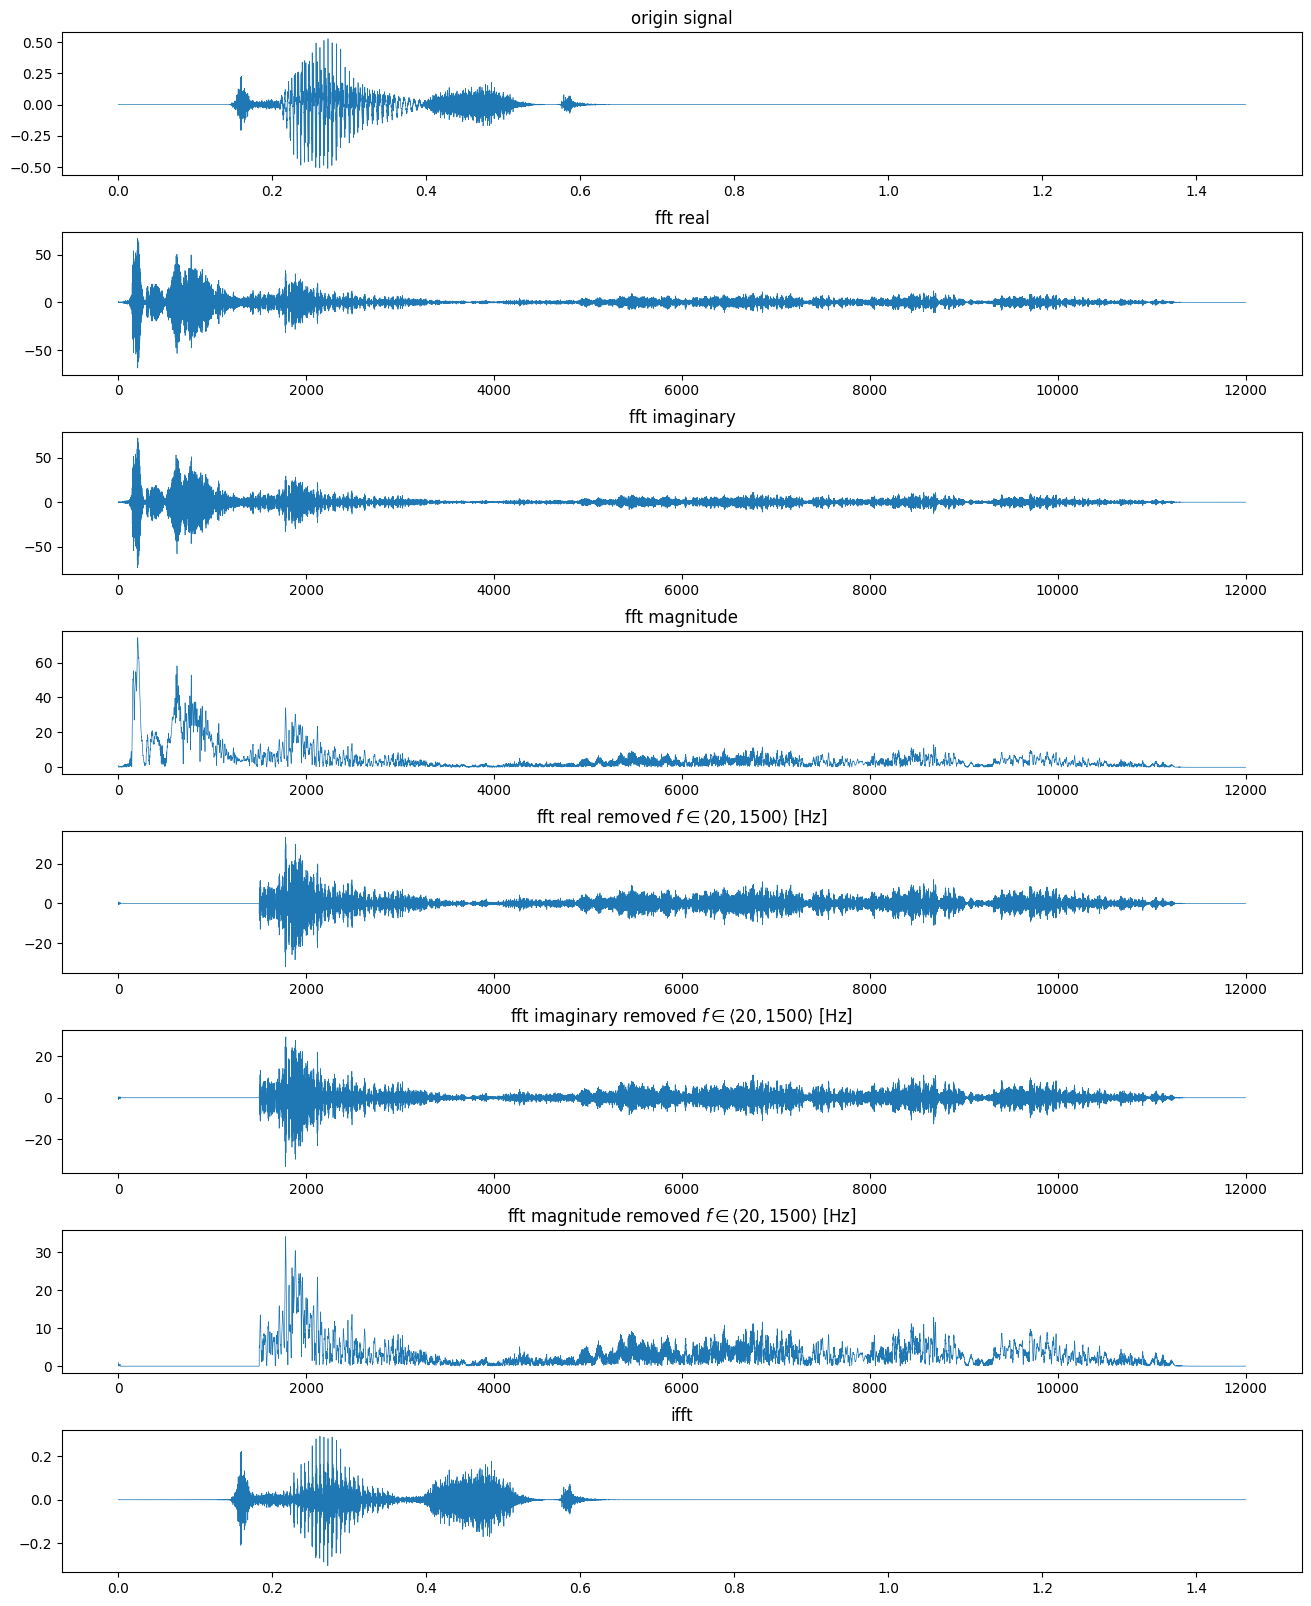

In [12]:
fig, axs = plt.subplots(8, figsize = (16, 20))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

axs[0].set_title("origin signal")
axs[0].plot(t_mp3, x_mp3, linewidth = 0.5)

axs[1].set_title("fft real")
axs[1].plot(f_mp3, np.real(y_mp3), linewidth = 0.5)

axs[2].set_title("fft imaginary")
axs[2].plot(f_mp3, np.imag(y_mp3), linewidth = 0.5)

axs[3].set_title("fft magnitude")
axs[3].plot(f_mp3, np.abs(y_mp3), linewidth = 0.5)

axs[4].set_title(r"fft real removed $f \in \langle 20, 1500 \rangle$ [Hz]")
axs[4].plot(f_mp3, np.real(y_mp3_changed), linewidth = 0.5)

axs[5].set_title(r"fft imaginary removed $f \in \langle 20, 1500 \rangle$ [Hz]")
axs[5].plot(f_mp3, np.imag(y_mp3_changed), linewidth = 0.5)

axs[6].set_title(r"fft magnitude removed $f \in \langle 20, 1500 \rangle$ [Hz]")
axs[6].plot(f_mp3, np.abs(y_mp3_changed), linewidth = 0.5)

axs[7].set_title("ifft")
axs[7].plot(t_mp3, x_mp3_changed, linewidth = 0.5)
plt.show()

In [13]:
import soundfile as sf

In [14]:
sf.write("output.wav", x_mp3_changed, sr)